# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')
#First, just to see what the data looks like..
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


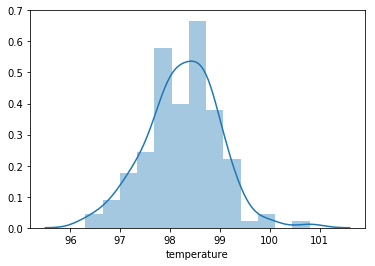

In [6]:
#From the histogram, it's approximately normal.
sns.distplot(df.temperature)
plt.show()

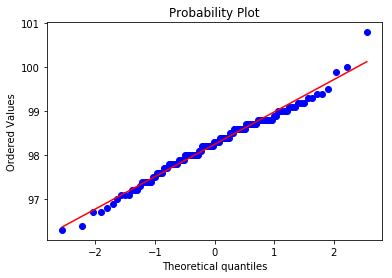

In [8]:
#The QQ-plot also approximately follows the line with no clear pattern, 
#which supports the evidence that temp comes from a normal distribution.
stats.probplot(df.temperature, plot=plt)
plt.show()

In [9]:
# This is a hypothesis test with the null test being the data is normally 
# distributed. It takes into consideration kurtosis and skew.
t_stat, pval = stats.normaltest(df.temperature)
print("Since {0:.4f} is a big p-value, we cannot reject the hypothesis that "
      "the data is normally distributed.".format(pval))

# For added evidence, this is the Shapiro-Wilk test.
t_stat, pval = stats.shapiro(df.temperature)
print("Since {0:.4f} is a big p-value, we cannot reject the hypothesis that "
      "the data is normally distributed.".format(pval))

Since 0.2587 is a big p-value, we cannot reject the hypothesis that the data is normally distributed.
Since 0.2332 is a big p-value, we cannot reject the hypothesis that the data is normally distributed.


In [10]:
# In order to use the CLT, we need at least 30 samples. We've no reason to think
# the data was not independently sampled, temperature data doesn't depend on 
# itself in any way.
print("The length of the data is " + str(len(df.temperature)) + ".")

The length of the data is 130.


In [34]:
# First we make a ton of replications
n = 1000
reps =  np.array([np.mean(np.random.choice(df.temperature, len(df.temperature))) for _ in range(n)]).flatten()

In [35]:
# Now, one thing we can do is compute a confidence interval for the means with alpha = 0.05 for a two way test.
conf_int  = np.percentile(reps,[2.5, 97.5])
print('With 95% confidence, the mean temperature is between {0:.2f} and {1:.2f}.'.format(conf_int[0], conf_int[1]))
# Compute a confidence interval for the means with alpha = 0.05 for a one way test.
conf_int  = np.percentile(reps,[5, 95])
print('With 90% confidence, the mean temperature is between {0:.2f} and {1:.2f}.'.format(conf_int[0], conf_int[1]))

With 95% confidence, the mean temperature is between 98.12 and 98.38.
With 90% confidence, the mean temperature is between 98.14 and 98.35.


A two way test here would signify that the mean temperature is simply not equal to 98.6. This hypothesis is rejected since 98.6 is significantly high.

Here, a one way test shows that there's sufficicient evidence to reject the null again. This hypothesis is rejected since 98.6 is significantly high, and the alternative hypothesis is that the true mean temperature is lower than 98.6.

In [13]:
# For the frequentist method, we actually don't know the true standard deviation for the original data, for this reason we use
# the student distribution. At n>30, it is identical to use the student t distribution or normal distribution for the test.
t = (98.6 - np.mean(df.temperature)) / (np.std(df.temperature)/np.sqrt(len(df.temperature)))
#The p-value is computed as 
p_val = 1 - stats.t.cdf(t,len(df.temperature) - 1)
print("With a test statistic of {0:.2f} and p-value of {1:.7f}, we can be very certain to reject the null hypothesis.".format(t,p_val))

With a test statistic of 5.48 and p-value of 0.0000001, we can be very certain to reject the null hypothesis.


In [17]:
#To demonstrate the same result with the z statistic.
z = (98.6 - np.mean(df.temperature)) / (np.std(df.temperature)/np.sqrt(len(df.temperature)))
# The p-val is
pval = 1 - stats.norm.cdf(z,0,1)
print("With a test statistic of {0:.2f} and p-value of {1:.7f}, we can be very certain to reject the null hypothesis.".format(t,p_val))
# Notice that the p-values are the same.

With a test statistic of 5.48 and p-value of 0.0000001, we can be very certain to reject the null hypothesis.


In [20]:
#Now we draw a sample size of 10 from the dataset, and repeat the tests. Because the size is 10, we must use the t-dist.
sample = np.random.choice(df.temperature, 10)
t = (98.6 - np.mean(sample)) / (np.std(sample)/np.sqrt(len(sample)))
#The p-value is computed as 
p_val = 1 - stats.t.cdf(t,len(sample) - 1)
print(p_val)
#Notice that the p-values is pretty big at this sample size.

With a test statistic of 0.31 and p-value of 0.3827474, we can be very certain to reject the null hypothesis.


In [46]:
# A fever is defined to be any temperature above 100.4 F. However, it's not reasonable to compute this from the bootstrap
# since the greatest value is 100.8, 100.4 would be in the 100th percentile and not likely at all. To compute something abnormal,
# we can just look at perhaps the 99%th confidence interval to determine an abnormal temperature
conf_int  = np.percentile(reps,[.5, 99.5])
print('With 99% confidence, the mean temperature is between {0:.2f} and {1:.2f}.'.format(conf_int[0], conf_int[1]))
#This result suggests that anything lower than 98 is abnormal and anything higher than 98.4 is abnormal. This isn't really a good
# result. We can, however, compute it a different way. 2.355 is the t value that covers 99% of the t-dist.
xHigh = np.mean(df.temperature) + np.std(df.temperature)*2.355
xLow = np.mean(df.temperature) - np.std(df.temperature)*2.355
print('{0:0.2f} is the suggested abnormally high temperature.'.format(xHigh))
print('{0:0.2f} is the suggested abnormally low temperature.'.format(xLow))

With 99% confidence, the mean temperature is between 98.09 and 98.40.
99.97 is the suggested abnormally high temperature.
96.53 is the suggested abnormally low temperature.


In [78]:
#In order to figure out if theres a difference in means between females and males, lets split them up first!
male_temps = df['temperature'].loc[df['gender'] == 'M'].values
female_temps = df['temperature'].loc[df['gender'] == 'F'].values
#We can do the same thing with bootstrapping to create a confidence interval of difference of means. Then draw a conclusion.
male_means = np.array([np.mean(np.random.choice(male_temps, len(male_temps))) for _ in range(n)]).flatten()
female_means = np.array([np.mean(np.random.choice(female_temps, len(female_temps))) for _ in range(n)]).flatten()
diff_of_means = female_means - male_means
# Now, the confidence interval.
conf_int  = np.percentile(diff_of_means,[2.5, 97.5])
print('With 95% confidence, the mean difference of temperature is between {0:.2f} and {1:.2f}.'.format(conf_int[0], conf_int[1]))
print('The value we got from the original dataset was {0:.02f}.'.format(np.mean(female_temps) - np.mean(male_temps)))
#Since .29 is inside the confidence interval, we cannot reject the notion of the mean temperatures being different..as expected.

With 95% confidence, the mean difference of temperature is between 0.03 and 0.54.
The value we got from the original dataset was 0.29.
